# **Schwarzschild metric - geodesics**

#### **M. Korzyński**

## **0. Loading modules, initialization**

In [4]:
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import optimize

import matplotlib as mpl
from matplotlib import pyplot as plt

from astropy import constants as const
from astropy.constants import iau2015
from astropy import units as u

from collections import namedtuple

InitialData = namedtuple('InitialData', ['r', 'phi', 't', 'dotr', 'dotphi', 'dott', 'm'])
ConstantsOfMotion = namedtuple('ConstantsOfMotion', ['m', 'E', 'L'])

# Schwarzschild mass
GM = 1.


## **1. The Schwarzschild metric**

$$g = -\left(1 - \frac{2GM}{r}\right)\,dt^2 + \left(1-\frac{2GM}{r}\right)^{-1}\,dr^2 + r^2\,\left(d\theta^2 + \sin^2\theta\,d\varphi^2\right)$$

The radial potential:
$$V(r) = \frac{m^2}{2} - \frac{GM m^2}{r} + \frac{L^2}{2r^2}-\frac{GML^2}{r^3}$$

#### **Extrema of the potential**

**Massive case:**
$$r_{\pm} = \frac{L^2}{2m^2\,M} \pm \frac{1}{2}\sqrt{\frac{L^4}{M^2\,m^4}-\frac{12L^2}{m^2}}$$

**Massless case:**
$$r_0 = 3M$$

In [5]:
def V_extrema(L, m2, GM):
    """Gives the extrema of V(r)"""
    if m2 > 0:
        delta = L**4 / (GM**2 * m2**2) - 12. * L**2 / m2
        assert delta >= 0
        return L**2 / (2. * m2 * GM) - 1. / 2. * np.sqrt(delta), L**2 / (2. * m2 * GM) + 1. / 2. * np.sqrt(delta)
    elif np.abs(m2) < 1e-6:
        return 3. * GM, None
    
def V_of_r(r, L, m2, GM):
    """Potential of the radial motion"""
    return m2 / 2. - GM * m2 / r + L**2 / (2 * r**2) - GM * L**2 / r**3

In [6]:

r_table = np.linspace(2.5 * GM, 40 * GM, 400)
L_table = [3., 4., 4.5, 5., 2*np.sqrt(3) * GM]
colors_table = ['tab:olive', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:cyan']
m2 = 1.

plt.figure(figsize=(10, 7))
plt.title(r'$V(r)$ for massive particles with $m=1$')

for L, color in zip(L_table, colors_table):
    try:
        r_plus, r_minus = V_extrema(L, m2=1., GM=GM)
    except AssertionError:
        r_plus = r_minus = None
        
    V_table = V_of_r(r_table, L=L, m2=1., GM=GM)
    plt.plot(r_table, V_table, label=r'$L=' + f'{L:1.2f}' + r'$', color=color, zorder=1)
    if r_minus is not None:
        plt.scatter(r_minus, V_of_r(r_minus, L=L, m2=1., GM=GM), edgecolors='black', color=color, zorder=2)
    if r_plus is not None:
        plt.scatter(r_plus, V_of_r(r_plus, L=L, m2=1., GM=GM), edgecolors='black', color=color, zorder=2)

# V_table = V_of_r(r_table, L=4.5, m2=1., GM=1.)
# plt.plot(r_table, V_table)

# V_table = V_of_r(r_table, L=5., m2=1., GM=1.)
# plt.plot(r_table, V_table)

# V_table = V_of_r(r_table, L=3., m2=1., GM=1.)
# plt.plot(r_table, V_table)
plt.axhline(y=0.5, color='tab:gray', linestyle='dotted' ,zorder=0)
plt.axvline(x=6 * GM, color='tab:blue', linestyle='--', zorder=0)
plt.annotate(text=r'$r=6GM$ (ISCO)', xy=(6., 0.25), xytext=(6.2, 0.29), color='tab:blue')

plt.axvline(x=3 * GM, color='tab:gray', linestyle='--', zorder=3)
plt.annotate(text=r'$r=3GM$', xy=(3., 0.25), xytext=(3.4, 0.24), color='tab:gray', alpha=1., backgroundcolor='white')

plt.xlabel(r'$r$ [$GM$]')
plt.ylabel(r'$V(r)$')
plt.legend()

plt.show()

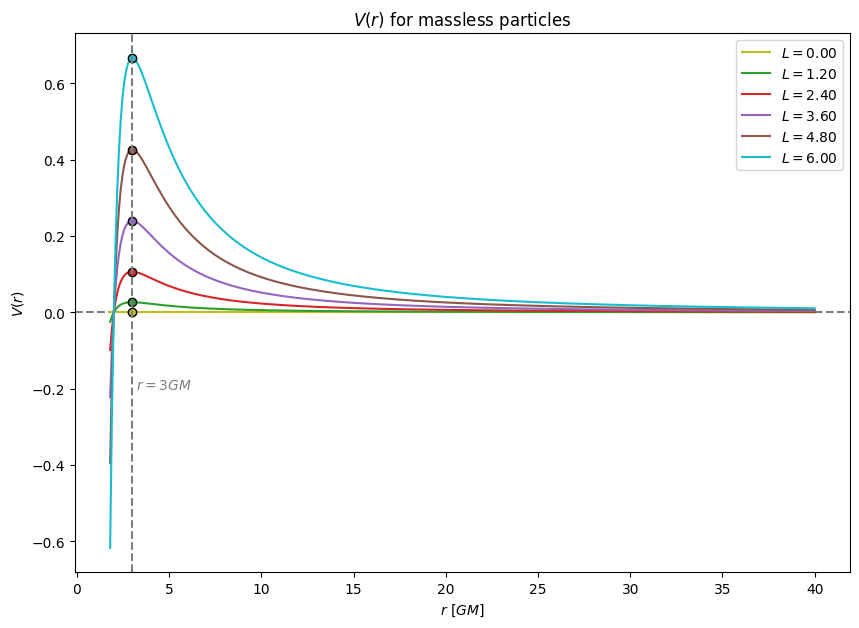

In [7]:
m2 = 0.
r_table = np.linspace(1.8 * GM, 40 * GM, 400)
#L_table = [3., 4., 4.5, 5., 2*np.sqrt(3) * GM]
L_table = np.linspace(0., 6., 6)
colors_table = ['tab:olive', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:cyan']

plt.figure(figsize=(10, 7))
plt.title(r'$V(r)$ for massless particles')

for L, color in zip(L_table, colors_table):
    try:
        r_plus, r_minus = V_extrema(L, m2=m2, GM=GM)
    except AssertionError:
        r_plus = r_minus = None
        
    V_table = V_of_r(r_table, L=L, m2=m2, GM=GM)
    plt.plot(r_table, V_table, label=r'$L=' + f'{L:1.2f}' + r'$', color=color, zorder=1)
    if r_minus is not None:
        plt.scatter(r_minus, V_of_r(r_minus, L=L, m2=m2, GM=GM), edgecolors='black', color=color, zorder=2)
    if r_plus is not None:
        plt.scatter(r_plus, V_of_r(r_plus, L=L, m2=m2, GM=GM), edgecolors='black', color=color, zorder=2)

# V_table = V_of_r(r_table, L=4.5, m2=1., GM=1.)
# plt.plot(r_table, V_table)

# V_table = V_of_r(r_table, L=5., m2=1., GM=1.)
# plt.plot(r_table, V_table)

# V_table = V_of_r(r_table, L=3., m2=1., GM=1.)
# plt.plot(r_table, V_table)
plt.axhline(y=0., color='tab:gray', linestyle='--' ,zorder=0)

plt.axvline(x=3 * GM, color='tab:gray', linestyle='--', zorder=3)
plt.annotate(text=r'$r=3GM$', xy=(3., 0.25), xytext=(3.2, -0.2), color='tab:gray')

plt.xlabel(r'$r$ [$GM$]')
plt.ylabel(r'$V(r)$')
plt.legend()

plt.show()

#### **Potential for the Keplerian motion**

$$V(r)= - \frac{GMm^2}{r} +  \frac{L^2}{2r^2}$$

The position of the minimum:

$$r_{\rm min} = \frac{L^2}{GM\,m^2}$$

In [8]:
def V_Keplerian(r, L, GM, m2):
    """Keplerian potential with scaling matching the relativistic one"""
    return -GM * m2 / r + L**2 / (2. * r**2)

def V_Keplerian_extremum(L, GM, m2):
    """Extremum (minimum) for a Keplerian orbit"""
    return L**2 / (GM * m2)


In [9]:
r_table = np.linspace(0.1*GM, 40 * GM, 400)
L_table = np.linspace(1., 5., 5)
colors_table = ['tab:olive', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:cyan']
m2 = 1.

plt.figure(figsize=(10, 7))
plt.title(r'$V(r)$ for the non-relativistic, Keplerian motion, $m=1$')

for L, color in zip(L_table, colors_table):
    r_min = V_Keplerian_extremum(L=L, m2=m2, GM=GM)
        
    V_table = V_Keplerian(r_table, L=L, m2=m2, GM=GM)
    plt.plot(r_table, V_table, label=r'$L=' + f'{L:1.2f}' + r'$', color=color, zorder=1)
    
    plt.scatter(r_min, V_Keplerian(r_min, L=L, m2=m2, GM=GM), edgecolors='black', color=color, zorder=2)
    

# V_table = V_of_r(r_table, L=4.5, m2=1., GM=1.)
# plt.plot(r_table, V_table)

# V_table = V_of_r(r_table, L=5., m2=1., GM=1.)
# plt.plot(r_table, V_table)

# V_table = V_of_r(r_table, L=3., m2=1., GM=1.)
# plt.plot(r_table, V_table)
plt.axhline(y=0.0, color='tab:gray', linestyle='dotted' ,zorder=0)
plt.axvline(x=0.0, color='black', zorder=0)


plt.xlabel(r'$r$ [$GM$]')
plt.ylabel(r'$V(r)$')
plt.legend()

plt.ylim((-0.6, 0.4))

plt.show()

### **Kruszkal-Szekeres coordinates**

**Standard coordinates - null geodesics**

$$r^* = r + 2M\,\ln\left(\frac{r}{2M} - 1\right)$$

$$ u = t - r^*(r)$$
$$ v = t + r^*(r)$$

In [10]:
def r_star(r, GM):
    """The r_star coordinate"""
    return r + 2. * GM * np.log(np.abs(r / (2. * GM) - 1.))


def inverse_r_star(rs, GM):
    """Inverse mapping from r_star to r, does't quite work yet"""
    return NotImplementedError
    rmin = min(rs, )
    rmax = max(rs, )
    solution = optimize.root_scalar(
        f=lambda r, GM: r_star(r, GM) - rs,
        args=(GM,),
        method='bisect',
        bracket=[min(rs, rs + 2. * GM * np.log(rs / (2. * GM) - 1)), max()],
        x0=rs
    )
    return solution.root
    

### **Plotting the $r^*(r)$ function**

In [11]:
r_table = np.linspace(2.01 * GM, 30 * GM, 150)
r_star_table = r_star(r_table, GM)

plt.figure(figsize=(10, 7))
plt.title(r'$r^*$ vs $r$')

ax = plt.gca()
ax.set_aspect('equal')

plt.plot(r_table, r_star_table, color='tab:blue', label=r'$r^*$')
plt.plot(r_table, r_table, color='tab:red', linewidth=1, linestyle='dotted', label=r'$r$')
plt.xlabel(r'$r\,\,[GM]$')
plt.ylabel(r'$r^*\,\,[GM]$')
plt.axvline(x=2. * GM, color='black', linestyle='dashed', linewidth=1)
plt.annotate(text=r'$r = 2GM$', xy=(2, 30), xytext=(2.8, 30))

plt.legend()

plt.show()

### **Plotting the infalling and outgoing radial photons**

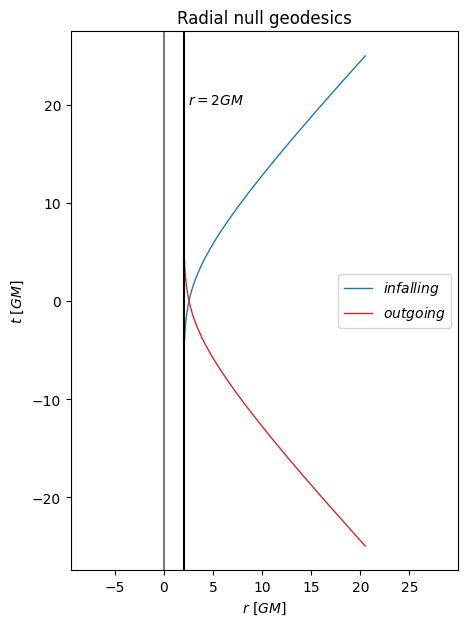

In [12]:
GM = 1.

plt.figure(figsize=(5, 7))
plt.title('Radial null geodesics')
plt.axis('equal')

r_table1 = np.linspace(0.1, 1.8, 50)
r_table2 = np.linspace(2.01, 20.5, 250)

plt.xlim((0., 20.5))
ax = plt.gca()
ax.set_aspect('equal')

u_table = np.linspace(-20., 20., 21)
v_table = u_table

plt.plot(r_table2, r_star(r_table2, GM), linewidth=1., linestyle='solid', color='tab:blue', label=r'$infalling$')

plt.plot(r_table2, -r_star(r_table2, GM), linewidth=1., linestyle='solid', color='tab:red', label=r'$outgoing$')

plt.axvline(x = 2. * GM, color='black')
plt.axvline(x = 0., color='tab:gray')
plt.annotate(text=r'$r=2GM$', xy=(2.5, 20))
plt.xlabel(r'$r\,\,[GM]$')
plt.ylabel(r'$t\,\,[GM]$')

plt.legend()

plt.show()


### **Plotting the $(u,v)$ coordinates**

In [13]:
GM = 1.

plt.figure(figsize=(10, 7))
plt.title('$u, v$ coordinates')
plt.axis('equal')

r_table1 = np.linspace(0.1, 1.8, 50)
r_table2 = np.linspace(2.01, 12, 250)

plt.xlim((0., 10.5))
plt.ylim((-4., 4.))

u_table = np.linspace(-20., 20., 21)
v_table = u_table

for u, v in zip(u_table, v_table):
    if u == u_table[0]:
        plt.plot(r_table2, r_star(r_table2, GM) + u, linewidth=1., linestyle='--', color='tab:blue', label=r'$u = {\rm const}$')
    else:
        plt.plot(r_table2, r_star(r_table2, GM) + u, linewidth=1., linestyle='--', color='tab:blue')
    if v == v_table[0]:
        plt.plot(r_table2, -r_star(r_table2, GM) + v, linewidth=1., linestyle='--', color='tab:red', label=r'$v = {\rm const}$')
    else:
        plt.plot(r_table2, -r_star(r_table2, GM) + v, linewidth=1., linestyle='--', color='tab:red')

plt.axvline(x = 2. * GM, color='black')
plt.axvline(x = 0., color='tab:gray')
plt.xlabel(r'$r\,\,[GM]$')
plt.ylabel(r'$t\,\,[GM]$')

plt.legend()

plt.show()



---

## **Scratch notes**